In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns

# Verilerin Yüklenmesi

In [2]:
# Datalarımızın yolunu değişkenlere atıyoruz sonra bu değişkenlerle okuma işlemini yapıyoruz
target_path = "Data/actual.csv"
test_path = "Data/data_set_ALL_AML_independent.csv"
train_path = "Data/data_set_ALL_AML_train.csv"

target_df = pd.read_csv(target_path, index_col = 'patient')
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

In [3]:
print(target_df)

        cancer
patient       
1          ALL
2          ALL
3          ALL
4          ALL
5          ALL
...        ...
68         ALL
69         ALL
70         ALL
71         ALL
72         ALL

[72 rows x 1 columns]


In [4]:
test_df

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A


In [5]:
train_df

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


# Preprocessing

In [6]:
# Buradaki iki satırda sırasıyla test ve train df'lerimizdeki call sütunlarını başka bir df'ye atıp o sütunları siliyoruz
temp_test = [col for col in test_df.columns if "call" in col]
test_call_df = test_df[temp_test]

test_df.drop(temp_test, axis=1, inplace=True)
test_df

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,67,893,722,612,1950,245,1235,...,618,507,1372,87,1111,707,423,809,466,551
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,263,297,170,370,906,164,9,...,308,64,642,98,459,354,41,445,349,194
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,-33,6,0,29,79,84,7,...,0,-11,-9,-26,-8,-22,0,-2,0,20
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,-33,1971,510,333,170,100,1545,...,196,198,608,153,73,260,1777,210,284,379


In [7]:
temp_train = [col for col in train_df.columns if "call" in col]
train_call_df = train_df[temp_train]

train_df.drop(temp_train, axis=1, inplace=True)
train_df

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,782,1138,627,250,645,1140,1799,...,752,1293,1733,1567,987,279,737,588,1170,2315
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,295,777,170,314,341,482,446,...,295,342,304,627,279,51,227,361,284,250
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,11,41,-50,14,26,10,59,...,28,26,12,21,22,6,-9,-26,39,-12
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,76,228,126,56,193,369,781,...,1558,246,3193,2520,662,2484,371,133,298,790


In [42]:
train_df.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [8]:
# train_call_df ve test_call_df'de call sütunlarında yer alan A-P-M değerleri yerine 0-1-2 değerlerini yazdırdık
train_call_df = train_call_df.replace("A", 0)
train_call_df = train_call_df.replace("P", 1)
train_call_df = train_call_df.replace("M", 2)

test_call_df = test_call_df.replace("A", 0)
test_call_df = test_call_df.replace("P", 1)
test_call_df = test_call_df.replace("M", 2)

In [9]:
rownames = "Call " + train_df.iloc[:,1] # burada "Call" stringiyle Gene Description değerlerini birleştirerek rownames isimli stringe atıyoruz

In [10]:
train_df

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,782,1138,627,250,645,1140,1799,...,752,1293,1733,1567,987,279,737,588,1170,2315
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,295,777,170,314,341,482,446,...,295,342,304,627,279,51,227,361,284,250
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,11,41,-50,14,26,10,59,...,28,26,12,21,22,6,-9,-26,39,-12
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,76,228,126,56,193,369,781,...,1558,246,3193,2520,662,2484,371,133,298,790


In [11]:
rownames

0       Call AFFX-BioB-5_at
1       Call AFFX-BioB-M_at
2       Call AFFX-BioB-3_at
3       Call AFFX-BioC-5_at
4       Call AFFX-BioC-3_at
               ...         
7124         Call X83863_at
7125         Call Z17240_at
7126       Call L49218_f_at
7127       Call M71243_f_at
7128       Call Z78285_f_at
Name: Gene Accession Number, Length: 7129, dtype: object

In [12]:
type(rownames)

pandas.core.series.Series

In [13]:
train_call_df.index = rownames
test_call_df.index = rownames
train_call_df.index

Index(['Call AFFX-BioB-5_at', 'Call AFFX-BioB-M_at', 'Call AFFX-BioB-3_at',
       'Call AFFX-BioC-5_at', 'Call AFFX-BioC-3_at', 'Call AFFX-BioDn-5_at',
       'Call AFFX-BioDn-3_at', 'Call AFFX-CreX-5_at', 'Call AFFX-CreX-3_at',
       'Call AFFX-BioB-5_st',
       ...
       'Call U48730_at', 'Call U58516_at', 'Call U73738_at', 'Call X06956_at',
       'Call X16699_at', 'Call X83863_at', 'Call Z17240_at',
       'Call L49218_f_at', 'Call M71243_f_at', 'Call Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [14]:
type(train_call_df.index)

pandas.core.indexes.base.Index

In [15]:
id_train = list(train_df.columns[2:])
id_test = list(test_df.columns[2:])

In [16]:
# Gene Accession Number'ları dataframe'imize ilk colon olarak aktarıyoruz
train_call_df.columns = id_train
test_call_df.columns = id_test

In [17]:
test_call_df

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
Call AFFX-BioB-5_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioB-M_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioB-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioC-5_at,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Call AFFX-BioC-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Call X83863_at,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call Z17240_at,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Call L49218_f_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_call_df

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
Call AFFX-BioB-5_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioB-M_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioB-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call AFFX-BioC-5_at,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,1,0,0
Call AFFX-BioC-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Call X83863_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Call Z17240_at,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Call L49218_f_at,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train_call_df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '34', '35', '36', '37', '38', '28', '29', '30', '31', '32',
       '33'],
      dtype='object')

In [20]:
test_call_df.columns

Index(['39', '40', '42', '47', '48', '49', '41', '43', '44', '45', '46', '70',
       '71', '72', '68', '69', '67', '55', '56', '59', '52', '53', '51', '50',
       '54', '57', '58', '60', '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [21]:
train_call_df = train_call_df.T  # Train transpozu alındı
train_call_df.head()

Gene Accession Number,Call AFFX-BioB-5_at,Call AFFX-BioB-M_at,Call AFFX-BioB-3_at,Call AFFX-BioC-5_at,Call AFFX-BioC-3_at,Call AFFX-BioDn-5_at,Call AFFX-BioDn-3_at,Call AFFX-CreX-5_at,Call AFFX-CreX-3_at,Call AFFX-BioB-5_st,...,Call U48730_at,Call U58516_at,Call U73738_at,Call X06956_at,Call X16699_at,Call X83863_at,Call Z17240_at,Call L49218_f_at,Call M71243_f_at,Call Z78285_f_at
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [22]:
test_call_df = test_call_df.T # Testin transpozu alındı
test_call_df.head()

Gene Accession Number,Call AFFX-BioB-5_at,Call AFFX-BioB-M_at,Call AFFX-BioB-3_at,Call AFFX-BioC-5_at,Call AFFX-BioC-3_at,Call AFFX-BioDn-5_at,Call AFFX-BioDn-3_at,Call AFFX-CreX-5_at,Call AFFX-CreX-3_at,Call AFFX-BioB-5_st,...,Call U48730_at,Call U58516_at,Call U73738_at,Call X06956_at,Call X16699_at,Call X83863_at,Call Z17240_at,Call L49218_f_at,Call M71243_f_at,Call Z78285_f_at
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [23]:
id_train = train_call_df.index
id_train = list(map(int, id_train)) # Burada gene accession number'larımız int'e çevirilip list haline getirildii

In [24]:
id_test = test_call_df.index
id_test = list(map(int, id_test)) # Yukarıdaki işlemin aynısı test içinde yapıldı

In [25]:
# train ve test target isminde iki adet boş liste oluşturuldu
train_target = []
test_target = []

for i in id_train:
  train_target.append(target_df.iloc[i-1,0])

for j in id_test:
  test_target.append(target_df.iloc[j-1,0])

In [26]:
train_target = pd.concat([pd.DataFrame(id_train), pd.DataFrame(train_target)], axis=1, ignore_index=False)
train_target.columns = ["patient", "cancer"] # Tekrar çalıştırma!!!

In [27]:
train_target # Aynısı test için de yapılacak

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
5,6,ALL
6,7,ALL
7,8,ALL
8,9,ALL
9,10,ALL


In [28]:
test_target = pd.concat([pd.DataFrame(id_test), pd.DataFrame(test_target)], axis=1, ignore_index=False)
test_target.columns = ["patient", "cancer"] # Tekrar çalıştırma!!!

In [29]:
test_target

,patient,cancer
0,39,ALL
1,40,ALL
2,42,ALL
3,47,ALL
4,48,ALL
5,49,ALL
6,41,ALL
7,43,ALL
8,44,ALL
9,45,ALL


In [30]:
# cancer sütunu iloc edildi
y_train = train_target.iloc[:,1]
y_test = test_target.iloc[:,1]

In [31]:
# ALL ve AML yerine 0-1 numaraları verildi, sonra bunları list'e çevirdik
y_train = y_train.replace("ALL", 0)
y_train = y_train.replace("AML", 1)
y_train = list(y_train)
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [32]:
# Yukarıdaki işlemlerin aynısını test işlemleri için uyguladık
y_test = y_test.replace("ALL", 0)
y_test = y_test.replace("AML", 1)
y_test = list(y_test)
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [33]:
gene_description = train_df.iloc[:,1]
train_df = train_df.iloc[:,2:]
train_df = train_df.T
train_df.columns = gene_description
train_df.index = id_train
train_df

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
6,-138,-85,215,71,-272,-558,67,-186,87,193,...,115,1221,-76,172,-74,645,341,26,193,-53
7,-72,-144,238,55,-399,-551,131,-179,126,-20,...,30,819,-178,151,-18,1140,482,10,369,-42
8,-413,-260,7,-2,-541,-790,-275,-463,70,-169,...,289,629,-86,302,23,1799,446,59,781,20
9,5,-127,106,268,-210,-535,0,-174,24,506,...,356,980,6,177,-12,758,385,115,244,-39
10,-88,-105,42,219,-178,-246,328,-148,177,183,...,42,986,26,101,21,570,359,9,171,7


In [34]:
test_df = test_df.iloc[:,2:]
test_df = test_df.T
test_df.columns = gene_description
test_df.index = id_test
test_df

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19
49,-256,-249,-410,24,-535,-810,709,-316,27,14,...,76,1455,-123,491,-55,1950,906,79,170,-64
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81
44,-146,-74,170,174,-32,-318,8,-152,-148,17,...,180,690,-142,249,-220,354,-42,-100,45,-108
45,-187,-187,312,142,114,-148,-184,-133,12,97,...,37,125,-185,13,-148,304,-1,-207,112,-190


# NORMALİZASYON

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

scaler.fit(train_df)
train_df = scaler.transform(train_df)
train_df = pd.DataFrame(train_df)
train_df.columns = gene_description
train_df.index = id_train
train_df

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,0.531440,0.566775,0.435315,0.289720,0.502041,0.365354,0.755011,0.653759,0.915068,0.542526,...,0.475460,0.200840,0.133838,0.141710,0.457317,0.282075,0.269663,0.521212,0.060407,0.438462
2,0.683570,0.827362,0.534965,0.745327,0.565306,0.614173,0.165924,0.671982,0.501370,0.372423,...,0.426380,0.428971,0.358586,0.162987,0.579268,0.276887,0.237828,0.369697,0.024413,0.615385
3,0.811359,0.905537,0.000000,0.806075,0.336735,0.220472,0.570156,0.218679,0.789041,0.000000,...,0.874233,0.682295,0.532828,0.052991,1.000000,0.444811,0.689139,0.551515,0.071987,0.407692
4,0.691684,0.693811,1.000000,0.112150,0.248980,0.322835,0.709354,0.478360,0.358904,0.317010,...,0.644172,0.427572,1.000000,0.055399,0.012195,0.203774,0.120787,0.000000,0.040063,0.023077
5,0.750507,0.657980,0.403846,0.476636,0.634694,0.796850,0.537862,0.776765,0.416438,0.601804,...,0.386503,0.297411,0.593434,0.187876,0.524390,0.025943,0.255618,0.387879,0.018153,0.530769
6,0.685598,0.788274,0.912587,0.250000,0.548980,0.365354,0.608018,0.630979,0.463014,0.525773,...,0.260736,0.697691,0.257576,0.054597,0.231707,0.212264,0.280899,0.460606,0.061033,0.315385
7,0.819473,0.596091,0.952797,0.212617,0.289796,0.376378,0.679287,0.646925,0.569863,0.251289,...,0.000000,0.416375,0.000000,0.046166,0.573171,0.445755,0.412921,0.363636,0.116119,0.400000
8,0.127789,0.218241,0.548951,0.079439,0.000000,0.000000,0.227171,0.000000,0.416438,0.059278,...,0.794479,0.283415,0.232323,0.106784,0.823171,0.756604,0.379213,0.660606,0.245070,0.876923
9,0.975659,0.651466,0.722028,0.710280,0.675510,0.401575,0.533408,0.658314,0.290411,0.929124,...,1.000000,0.529041,0.464646,0.056604,0.609756,0.265566,0.322097,1.000000,0.076995,0.423077
10,0.787018,0.723127,0.610140,0.595794,0.740816,0.856693,0.898664,0.717540,0.709589,0.512887,...,0.036810,0.533240,0.515152,0.026094,0.810976,0.176887,0.297753,0.357576,0.054147,0.776923


In [37]:
scaler.fit(test_df)
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df)
test_df.columns = gene_description
test_df.index = id_test
test_df

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,0.000000,0.638996,0.624654,0.755924,0.479199,0.556686,0.218661,0.362812,0.742188,0.240713,...,0.711253,0.683284,0.847775,0.216561,0.318352,0.534785,0.545359,0.876289,0.115743,0.447761
40,0.595794,0.546332,0.930748,0.677725,0.476117,0.460756,0.804236,0.000000,0.890625,0.468053,...,0.299363,0.321114,0.000000,0.342129,0.573034,0.000000,0.321730,0.597938,0.017165,0.630597
42,0.850467,0.729730,0.591413,0.632701,0.499230,0.813953,0.625644,0.705215,0.385417,0.719168,...,1.000000,0.225806,0.728337,0.529572,0.913858,0.438662,0.357595,0.731959,1.000000,0.552239
47,0.231308,0.604247,0.342105,0.409953,0.379045,0.787791,0.431025,0.634921,0.520833,0.248143,...,0.492569,0.136364,0.704918,0.095541,0.831461,0.347849,0.223629,0.711340,0.283472,0.436567
48,0.495327,0.683398,0.529086,0.609005,0.562404,0.703488,0.467086,0.814059,0.411458,0.465825,...,0.617834,0.404692,0.810304,0.431301,0.651685,0.289432,0.434599,0.810997,0.196665,0.638060
49,0.200935,0.544402,0.000000,0.035545,0.000000,0.000000,1.000000,0.308390,0.455729,0.358098,...,0.284501,1.000000,0.402810,0.468608,0.617978,1.000000,1.000000,0.982818,0.116724,0.470149
41,0.654206,0.980695,0.558172,0.315166,0.465331,0.764535,0.498569,0.804989,0.354167,0.295691,...,0.397028,0.214076,0.798595,0.116470,0.880150,0.094530,0.217300,1.000000,0.082393,0.641791
43,1.000000,0.955598,0.372576,0.575829,0.514638,0.619186,0.353749,0.578231,0.229167,0.000000,...,0.847134,0.000000,0.494145,0.581438,0.629213,0.620287,0.053797,0.735395,0.791074,0.406716
44,0.457944,0.882239,0.803324,0.390995,0.775039,0.715116,0.598741,0.680272,0.000000,0.360327,...,0.505308,0.439150,0.358314,0.248408,0.000000,0.152416,0.000000,0.367698,0.055419,0.305970
45,0.362150,0.664093,1.000000,0.315166,1.000000,0.962209,0.488838,0.723356,0.416667,0.419762,...,0.201699,0.024927,0.257611,0.033667,0.269663,0.125863,0.043249,0.000000,0.088279,0.000000


### Scale the data sets

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
train_df = train_df.astype(float, 64)
test_df = test_df.astype(float, 64)

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df) 

### Principal Component Analysis(PCA)

In [47]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA()
train_df_scaled_copy = train_df_scaled
pca.fit_transform(train_df_scaled_copy)

array([[ 1.85447987e+01,  5.82694304e+00, -1.94423127e+01, ...,
        -3.14979582e+00, -5.19942835e-01,  1.45162143e-14],
       [-7.34138894e+00,  1.00086631e+01,  1.17956977e+01, ...,
         3.91741309e+00, -2.34562750e-01,  1.45162143e-14],
       [ 5.28521459e+01,  1.13906298e+01, -2.95485659e+01, ...,
        -3.08792878e+00,  3.61420168e+00,  1.45162143e-14],
       ...,
       [ 3.29958693e+00, -2.63018075e+01,  8.76633590e-01, ...,
        -7.79008035e-01, -5.71406496e+00,  1.45162143e-14],
       [ 3.14422261e+01, -8.74368454e+00,  9.76210148e+00, ...,
         2.42913115e+00,  4.83899287e-01,  1.45162143e-14],
       [ 7.48350965e+01, -2.30086262e+01,  4.09630984e+01, ...,
         6.81823148e-01,  1.78649973e+00,  1.45162143e-14]])

28 features explain around 90% of the variance


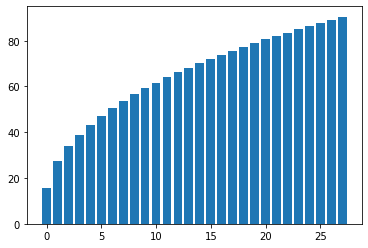

In [50]:
total = sum(pca.explained_variance_)
no_features = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[no_features]
    no_features = no_features + 1
    
print(f'{no_features} features explain around 90% of the variance')

pca = PCA(n_components = no_features)
train_df_pca = pca.fit_transform(train_df)
test_df_pca = pca.transform(test_df)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp * 100
plt.bar(range(no_features), var_exp);

### Gerekli Fonksiyonlar

In [39]:
def dogruluk_yazdirma(classifier):
        return print("Doğruluk: {}" .format(classifier.score(test_df, y_test)))

In [42]:
 def model_kaydet(model_adi,model_alg):
        pick = open('models2/'+model_adi+'.p','wb')
        pickle.dump(model_alg,pick)
        pick.close()
        print(f" {model_adi} Model dosyası başarıyla oluşturuldu!..")

### Test

In [106]:
new_df = test_df.iloc[1:2,:] # satırdaki hasta
new_df
predict1 = xgb_clf.predict_proba(new_df)
hastalik= ['ALL','AML']
for ind,patient in enumerate(hastalik):
    print(f'{patient} = {predict1[0][ind]*100}%')

ALL = 96.4894711971283%
AML = 3.5105276852846146%


## SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',random_state=42)
train_df_res, y_train_res = sm.fit_resample(train_df, y_train)

## BAGGING


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

params_bagging = {'base_estimator': [LogisticRegression(C = 0.000125,penalty='l1',solver='liblinear'),
                                     DecisionTreeClassifier(criterion='gini',max_depth=8,max_features=8), 
                                     SVC(probability=True,C = 0.1, kernel = 'linear')],
          'n_estimators': [20,30],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]
          }

bagginClf = BaggingClassifier(random_state=42)
hpo_bagging = GridSearchCV(bagginClf, params_bagging,cv=5)
hpo_bagging.fit(train_df, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid={'base_estimator': [LogisticRegression(C=0.000125,
                                                               penalty='l1',
                                                               solver='liblinear'),
                                            DecisionTreeClassifier(max_depth=8,
                                                                   max_features=8),
                                            SVC(C=0.1, kernel='linear',
                                                probability=True)],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [20, 30]})

In [46]:
print(hpo_bagging.best_params_,"\n")
dogruluk_yazdirma(hpo_bagging)
model_kaydet('bagging_hpo_or',hpo_bagging)

{'base_estimator': SVC(C=0.1, kernel='linear', probability=True), 'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 20} 

Doğruluk: 0.7941176470588235
 bagging_hpo_or Model dosyası başarıyla oluşturuldu!..


## XGBoost

In [50]:
import xgboost as xgb
param_grid_xgb = {
              'learning_rate': [0.9],
              'n_estimators': [20] ,
               'gamma' : [1],        
              }

xgbc = xgb.XGBClassifier(seed=42)


xgb_clf = GridSearchCV(estimator=xgbc, param_grid=param_grid_xgb,cv = 5)

# xgb_clf=xgb.XGBClassifier(learning_rate = 0.9,n_estimators = 25,seed=42)

xgb_clf.fit(train_df, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'gamma': [1], 'learning_rate': [0.9],
                         'n_estimators': [20]})

In [51]:
dogruluk_yazdirma(xgb_clf)

Doğruluk: 0.9117647058823529


In [52]:
model_kaydet('xgb_hpo_or',xgb_clf)

 xgb_hpo_or Model dosyası başarıyla oluşturuldu!..


# SVM

In [53]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [57]:
tuned_parameters = [{'kernel': ['linear'], 'C': [0.0001,0.001,0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1e-1, 1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'C': [1e-1, 1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': [1e-4, 1e-2, 1, 5, 10],
                     'C': [1e-1, 1, 10, 100, 1000]},]
model = svm.SVC()
classifier = GridSearchCV(model, tuned_parameters, cv=10)
classifier.fit(train_df, y_train)
print(classifier.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [58]:
svm_classifier = svm.SVC(kernel='linear', C = 0.1,probability=True,random_state = 52)
svm_classifier.fit(train_df, y_train)
dogruluk_yazdirma(svm_classifier)

Doğruluk: 0.7352941176470589


In [59]:
model_kaydet('svm_hpo_or',svm_classifier)

 svm_hpo_or Model dosyası başarıyla oluşturuldu!..


# K NEIGHBORS

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": [2,3,5,6],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto"],
    "leaf_size": [1,2,3],
    "p": [1, 2]
}

model = KNeighborsClassifier()
knn_classifier = GridSearchCV(model, knn_params , cv=5, n_jobs=-1)
knn_classifier.fit(train_df_res, y_train_res)
print(knn_classifier.best_params_)


{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


In [65]:
knn_classifier = KNeighborsClassifier(algorithm = 'auto',leaf_size =1, n_neighbors = 2,p=1, weights = 'uniform')
knn_classifier.fit(train_df_res, y_train_res)
dogruluk_yazdirma(knn_classifier)

Doğruluk: 0.7941176470588235


In [66]:
model_kaydet('knn_hpo_smote',knn_classifier)

 knn_hpo_smote Model dosyası başarıyla oluşturuldu!..


# LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

tuned_parameters_logisticregression = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3,-4,4,3,20),
    'solver' : ['liblinear']}

model = LogisticRegression()
classifier = GridSearchCV(model, tuned_parameters_logisticregression, cv=5)
classifier.fit(train_df, y_train)
print(classifier.best_params_)


{'C': 0.000125, 'penalty': 'l1', 'solver': 'liblinear'}


In [71]:
logisticregression_classifier = LogisticRegression(C =0.000125,penalty = 'l1', solver = 'liblinear' )
logisticregression_classifier.fit(train_df, y_train)
dogruluk_yazdirma(logisticregression_classifier)

Doğruluk: 0.5882352941176471


In [72]:
model_kaydet('logisticregression_hpo_or',logisticregression_classifier)

 logisticregression_hpo_or Model dosyası başarıyla oluşturuldu!..


# DECİSİON TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier


decision_tree_parameters = [{'max_depth':np.arange(3, 15),
                  'max_features':[1,2,4,6,8,10,15,20],
                  'criterion':['gini','entropy']}]
                 

model = DecisionTreeClassifier()
classifier = GridSearchCV(model, decision_tree_parameters, cv=5)
classifier.fit(train_df_res, y_train_res)
print(classifier.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 4}


In [77]:
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=4)
decision_tree_classifier.fit(train_df_res, y_train_res)
dogruluk_yazdirma(decision_tree_classifier)

Doğruluk: 0.6176470588235294


In [78]:
model_kaydet('decision_tree_hpo_smote',decision_tree_classifier)

 decision_tree_hpo_smote Model dosyası başarıyla oluşturuldu!..


# RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Rastgele ormandaki ağaç sayısı
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 210, num = 15)]
criterion = ['gini','entropy']
# Ağaçtaki maksimum seviye sayısı
max_depth = [2,4]
max_depth.append(None)
# Bir düğümü bölmek için gereken minimum örnek sayısı # 5
# Her yaprak düğümünde gereken minimum numune sayısı
# Her ağacı eğitmek için örnek seçme yöntemi
bootstrap = [True, False]

random_forest_parameters = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion' : criterion,
               'bootstrap': bootstrap}

model = RandomForestClassifier()
classifier = GridSearchCV(model, random_forest_parameters,)
classifier.fit(train_df, y_train)
print(classifier.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150}


In [83]:
random_forest_classifier = RandomForestClassifier(n_estimators = 150, max_depth=2, criterion = 'gini', bootstrap=False)
random_forest_classifier.fit(train_df, y_train) # bootstrap = False
dogruluk_yazdirma(random_forest_classifier)

Doğruluk: 0.7941176470588235


In [84]:
model_kaydet('random_forest_hpo_or',random_forest_classifier)

 random_forest_hpo_or Model dosyası başarıyla oluşturuldu!..


### Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=5, verbose=False)
gradient_boosting_CV.fit(train_df_res, y_train_res)
print(gradient_boosting_CV.best_params_)


{'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 3}


In [96]:
gradient_boosting_CV = GradientBoostingClassifier(learning_rate = 0.05, max_depth=2, min_samples_leaf = 3)
gradient_boosting_CV.fit(train_df_res, y_train_res)
dogruluk_yazdirma(gradient_boosting_CV)

Doğruluk: 0.9117647058823529


In [97]:
model_kaydet('gradient_boosting_hpo_smote',gradient_boosting_CV)

 gradient_boosting_hpo_smote Model dosyası başarıyla oluşturuldu!..


In [ ]:

    
# basic svm = 0.73 *
# basic knn = 0.02
# basic logistic regression = 0.58
# basic decision tree = 0.52 *


### AdaBoost Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
Ada_Boost = AdaBoostClassifier()
Ada_Boost_CV = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.101, 0.102, 0.105]}, cv=5, verbose=False)
Ada_Boost_CV.fit(train_df, y_train)
print(Ada_Boost_CV.best_params_)

{'learning_rate': 0.102}


In [90]:
Ada_Boost_CV = AdaBoostClassifier( learning_rate = 0.102 )
Ada_Boost_CV.fit(train_df, y_train)
dogruluk_yazdirma(Ada_Boost_CV)

Doğruluk: 0.9117647058823529


In [91]:
model_kaydet('adaBoost_hpo_or',Ada_Boost_CV)

 adaBoost_hpo_or Model dosyası başarıyla oluşturuldu!..


### Model Karşılaştırması

In [54]:
modeller = []
path_model = 'models2/'
def model_load(dosya):
    for modelim in os.listdir(dosya):
        modeller.append(modelim)
    
model_load(path_model)
print(modeller)

['adaBoost_hpo_or.p', 'adaBoost_hpo_smote.p', 'bagging_hpo_or.p', 'bagging_hpo_smote.p', 'decision_tree_hpo_or.p', 'decision_tree_hpo_smote.p', 'gradient_boosting_hpo_or.p', 'gradient_boosting_hpo_smote.p', 'knn_hpo_or.p', 'knn_hpo_smote.p', 'logisticregression_hpo_or.p', 'logisticregression_hpo_smote.p', 'random_forest_hpo_or.p', 'random_forest_hpo_smote.p', 'svm_hpo_or.p', 'svm_hpo_smote.p', 'xgb_hpo_or.p', 'xgb_hpo_smote.p']


In [57]:
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score


accuracy_values=[]
recall_values = []
precision_values = []
f1_values = []

def metric_degerlendirmeler(kayitli_model, x_test_data,y_test_data):
    modelx=pickle.load(open('models2/'+kayitli_model,'rb'))
    y_pred = modelx.predict(x_test_data)
    accuracy_values.append(accuracy_score(y_test_data,y_pred)*100)
    recall_values.append(recall_score(y_test_data,y_pred,average='macro')*100)
    precision_values.append(precision_score(y_test_data,y_pred,average='macro')*100)
    f1_values.append(f1_score(y_test_data,y_pred,average='macro')*100)
    
for i in modeller:
    metric_degerlendirmeler(i,test_df,y_test)
      

C:\Users\aleyy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
tum_metricler = [accuracy_values,recall_values,precision_values,f1_values]

In [91]:
def metric_ciz(cizilecek_data,metric_adi):
    plt.subplots(figsize =(10, 8))

    sns.barplot(x='Score', y = 'Model', data = cizilecek_data, palette="Set3")

    #prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
    plt.title(f'Machine Learning Algorithm {metric_adi} Score \n')
    plt.xlabel(f'{metric_adi} (%)')
    plt.ylabel('Algorithms')

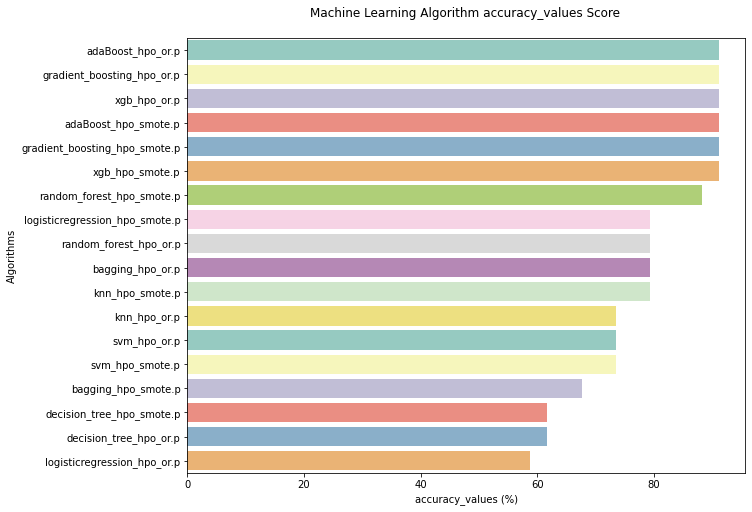

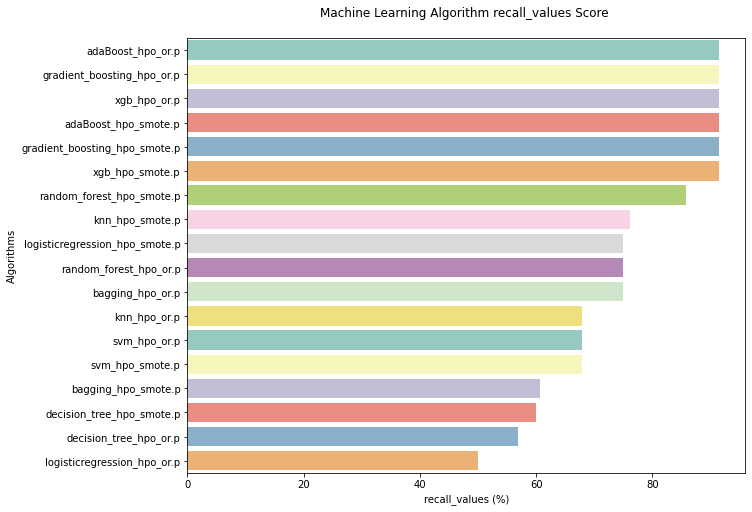

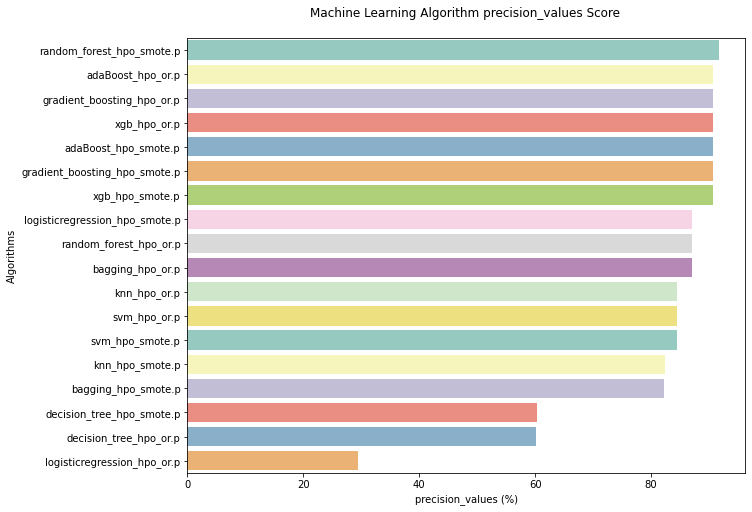

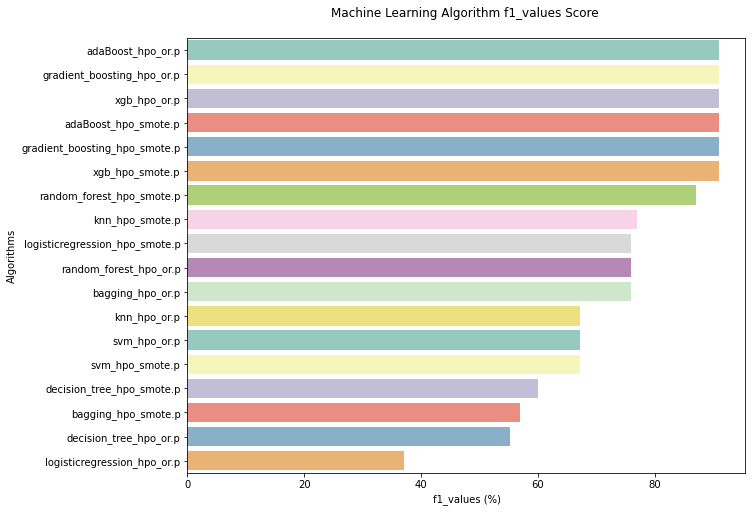

In [92]:
metric_adlari = ['accuracy_values','recall_values','precision_values','f1_values']
sayac = 0
for metric in tum_metricler:
    models = pd.DataFrame({
        'Model': modeller,
        'Score': metric})
    sorted_models = models.sort_values(by='Score', ascending=False)
    metric_ciz(sorted_models,metric_adlari[sayac])
    sayac = sayac + 1